# Rebinning opacities

<div class="alert alert-warning">

In the following we use "wavelength binning" and "resolution" interchangeably. In all cases we mean $\lambda/\Delta \lambda$, where $\lambda$ is the wavelength at which the opacities in pRT are defined, and $\Delta \lambda$ is the wavelength difference between two neighboring wavelength points. Please see ["Wavelength binning vs. spectral resolution"](#Wavelength-binning-vs.-spectral-resolution) for more information on how this relates to the spectral resolution of exoplanet data.

</div>

Intrinsically, pRT has two different opacity treatments. One makes use of the so-called correlated-k assumption (`line_opacity_mode='c-k'` when instantiating a `Radtrans` object), and allows you to calculate spectra at a default wavelength binning of $\lambda / \Delta \lambda = 1000$. The other treatment is the so-called line-by-line method (`line_opacity_mode='lbl'`), and allows you to calculate spectra at default binning of $\lambda / \Delta \lambda = 10^6$.

Sometimes you may want to calculate spectra at a larger wavelength spacing, however, say at $\lambda / \Delta \lambda = 150$ in the `c-k` mode, or at $\lambda / \Delta \lambda = 250,000$ in `lbl` mode. Of course it is possible to run calculations at high intrinsic resolution first, and then bin down, but this is numerically inefficient. This is why you can easily specify lower resolutions in the retrieval package of pRT, [see the tutorial here](./retrieval_basic.ipynb). Here we show you how to specify resolutions outside of the retrieval package.

## Binning opacities in `c-k` mode

To run at a larger wavelength binning (so lower resolution) in `c-k` mode, just create a pRT object as usual, but this time add, for example, `'.R100'` to the requested line species name. In this case the effective wavelength binning would be changed to $\lambda / \Delta \lambda = 100$. What happens inside pRT is that it will look whether such a binned down opacity file already exists in your `input_data` folder. If it does, it will simply read it in. If it does not exist, the opacities will be binned to lower resolution and a corresponding file will be saved to the `input_data` folder. So if you rebin to many different resolutions for many different species, your `input_data` folder will grow. You may check its size from time to time and remove those resolution files that you no longer need (you can always recreate them at a small computational overhead when creating a pRT object). Please note that since pRT's maximum resolution in `'c-k'` mode is 1000, you can only bin opacities to values lower than 1000.

<div class="alert alert-info">

For binning opacities down in `'c-k'` mode we use the [Exo_k](https://perso.astrophy.u-bordeaux.fr/~jleconte/exo_k-doc/index.html) package. Please cite it and the corresponding paper [(Leconte et al. 2021)](https://ui.adsabs.harvard.edu/abs/2021A%26A...645A..20L/abstract) if you make use of this functionality in pRT.

</div>

Here we create a pRT object like in the [Getting Started](./getting_started.ipynb) example, but at $\lambda / \Delta \lambda = 100$:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from petitRADTRANS.radtrans import Radtrans

atmosphere = Radtrans(
    pressures=np.logspace(-6, 2, 100),
    line_species=[
        'H2O.R100', 
        'CO-NatAbund.R100', 
        'CH4.R100', 
        'CO2.R100', 
        'Na.R100',
        'K.R100'
    ],
    rayleigh_species=['H2', 'He'],
    gas_continuum_contributors=['H2-H2', 'H2-He'],
    wavelength_boundaries=[0.3, 15]
)

Rebinning file '/home/dblain/petitRADTRANS/input_data/opacities/lines/correlated_k/H2O/1H2-16O/1H2-16O__HITEMP.R1000_0.1-250mu.ktable.petitRADTRANS.h5' to R = 100...  Done.
 Writing binned down file '/home/dblain/petitRADTRANS/input_data/opacities/lines/correlated_k/H2O/1H2-16O/1H2-16O__HITEMP.R100_0.1-250mu.ktable.petitRADTRANS.h5'...  Done.
Successfully binned down k-table into '/home/dblain/petitRADTRANS/input_data/opacities/lines/correlated_k/H2O/1H2-16O/1H2-16O__HITEMP.R100_0.1-250mu.ktable.petitRADTRANS.h5' (R = 100)
Loading Radtrans opacities...
 Loading line opacities of species 'H2O.R100' from file '/home/dblain/petitRADTRANS/input_data/opacities/lines/correlated_k/H2O/1H2-16O/1H2-16O__HITEMP.R100_0.1-250mu.ktable.petitRADTRANS.h5'... Done.
Rebinning file '/home/dblain/petitRADTRANS/input_data/opacities/lines/correlated_k/CO/C-O-NatAbund/C-O-NatAbund__HITEMP.R1000_0.1-250mu.ktable.petitRADTRANS.h5' to R = 100...  Done.
 Writing binned down file '/home/dblain/petitRADTRANS/inpu

Now, as you would see when running it again, making the pRT object a second time will be faster, and with less output, since the opacities have already been binned to lower resolution:

In [2]:
atmosphere = Radtrans(
    pressures=np.logspace(-6, 2, 100),
    line_species=[
        'H2O.R100', 
        'CO-NatAbund.R100', 
        'CH4.R100', 
        'CO2.R100', 
        'Na.R100',
        'K.R100'
    ],
    rayleigh_species = ['H2', 'He'],
    gas_continuum_contributors = ['H2-H2', 'H2-He'],
    wavelength_boundaries = [0.3, 15]
)

Loading Radtrans opacities...
 Loading line opacities of species 'H2O.R100' from file '/home/dblain/petitRADTRANS/input_data/opacities/lines/correlated_k/H2O/1H2-16O/1H2-16O__HITEMP.R100_0.1-250mu.ktable.petitRADTRANS.h5'... Done.
 Loading line opacities of species 'CO-NatAbund.R100' from file '/home/dblain/petitRADTRANS/input_data/opacities/lines/correlated_k/CO/C-O-NatAbund/C-O-NatAbund__HITEMP.R100_0.1-250mu.ktable.petitRADTRANS.h5'... Done.
 Loading line opacities of species 'CH4.R100' from file '/home/dblain/petitRADTRANS/input_data/opacities/lines/correlated_k/CH4/12C-1H4/12C-1H4__YT34to10.R100_0.3-50mu.ktable.petitRADTRANS.h5'... Done.
 Loading line opacities of species 'CO2.R100' from file '/home/dblain/petitRADTRANS/input_data/opacities/lines/correlated_k/CO2/12C-16O2/12C-16O2__UCL-4000.R100_0.3-50mu.ktable.petitRADTRANS.h5'... Done.
 Loading line opacities of species 'Na.R100' from file '/home/dblain/petitRADTRANS/input_data/opacities/lines/correlated_k/Na/23Na/23Na__Allard.R

For comparison, we will create also a `Radtrans` object at pRT's standard corrleated-k opacity resolution ($\lambda / \Delta \lambda = 1000$).

In [3]:
atmosphere_standard_binning = Radtrans(
    pressures = np.logspace(-6, 2, 100),
    line_species = [
        'H2O', 
        'CO-NatAbund', 
        'CH4', 
        'CO2', 
        'Na',
        'K'
    ],
    rayleigh_species = ['H2', 'He'],
    gas_continuum_contributors = ['H2-H2', 'H2-He'],
    wavelength_boundaries = [0.3, 15]
)

Loading Radtrans opacities...
 Loading line opacities of species 'H2O' from file '/home/dblain/petitRADTRANS/input_data/opacities/lines/correlated_k/H2O/1H2-16O/1H2-16O__HITEMP.R1000_0.1-250mu.ktable.petitRADTRANS.h5'... Done.
 Loading line opacities of species 'CO-NatAbund' from file '/home/dblain/petitRADTRANS/input_data/opacities/lines/correlated_k/CO/C-O-NatAbund/C-O-NatAbund__HITEMP.R1000_0.1-250mu.ktable.petitRADTRANS.h5'... Done.
 Loading line opacities of species 'CH4' from file '/home/dblain/petitRADTRANS/input_data/opacities/lines/correlated_k/CH4/12C-1H4/12C-1H4__YT34to10.R1000_0.3-50mu.ktable.petitRADTRANS.h5'... Done.
 Loading line opacities of species 'CO2' from file '/home/dblain/petitRADTRANS/input_data/opacities/lines/correlated_k/CO2/12C-16O2/12C-16O2__UCL-4000.R1000_0.3-50mu.ktable.petitRADTRANS.h5'... Done.
 Loading line opacities of species 'Na' from file '/home/dblain/petitRADTRANS/input_data/opacities/lines/correlated_k/Na/23Na/23Na__Allard.R1000_0.1-250mu.ktable

Let's quickly calculate the getting started example to compare the two results:

Text(0, 0.5, 'Transit radius [$\\rm R_{Jup}$]')

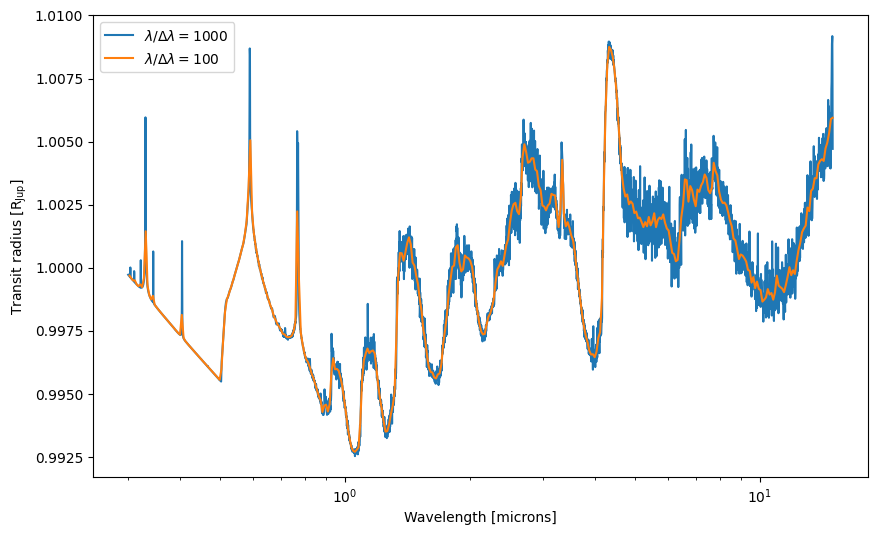

In [4]:
from petitRADTRANS import physical_constants as cst
temperatures = 1200.0 * np.ones_like(atmosphere.pressures) # note that pressures is in cgs units now, multiply by 1e-6 to get bars.

mass_fractions = {
    'H2': 0.74 * np.ones_like(temperatures), 
    'He': 0.24 * np.ones_like(temperatures),
    'H2O': 1e-3 * np.ones_like(temperatures), 
    'CO-NatAbund': 1e-2 * np.ones_like(temperatures),
    'CO2': 1e-4 * np.ones_like(temperatures), 
    'CH4': 1e-5 * np.ones_like(temperatures),
    'Na': 1e-4 * np.ones_like(temperatures), 
    'K': 1e-6 * np.ones_like(temperatures)
}

mean_molar_masses = 2.33 * np.ones_like(temperatures)  #  2.33 is a typical value for H2-He dominated atmospheres

planet_radius = 1.0 * cst.r_jup_mean
reference_gravity = 10 ** 3.5
reference_pressure = 0.01

wavelengths, transit_radii, _ = atmosphere.calculate_transit_radii(
    temperatures=temperatures, 
    mass_fractions=mass_fractions, 
    mean_molar_masses=mean_molar_masses, 
    reference_gravity=reference_gravity, 
    planet_radius=planet_radius, 
    reference_pressure=reference_pressure
)

wavelengths_standard_binning, transit_radii_standard_binning, _ = atmosphere_standard_binning.calculate_transit_radii(
    temperatures=temperatures, 
    mass_fractions=mass_fractions, 
    mean_molar_masses=mean_molar_masses, 
    reference_gravity=reference_gravity, 
    planet_radius=planet_radius, 
    reference_pressure=reference_pressure
)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(
    wavelengths_standard_binning * 1e4,
    transit_radii_standard_binning / cst.r_jup_mean,
    label=r'$\lambda / \Delta \lambda=1000$'
)
ax.plot(
    wavelengths * 1e4,
    transit_radii / cst.r_jup_mean,
    label=r'$\lambda / \Delta \lambda=100$'
)
ax.set_xscale('log')
plt.legend()
ax.set_xlabel('Wavelength [microns]')
ax.set_ylabel(r'Transit radius [$\rm R_{Jup}$]')

And the numerically calculated resolution is consistent with what we requested:

Text(0, 0.5, '$\\lambda/\\Delta\\lambda$')

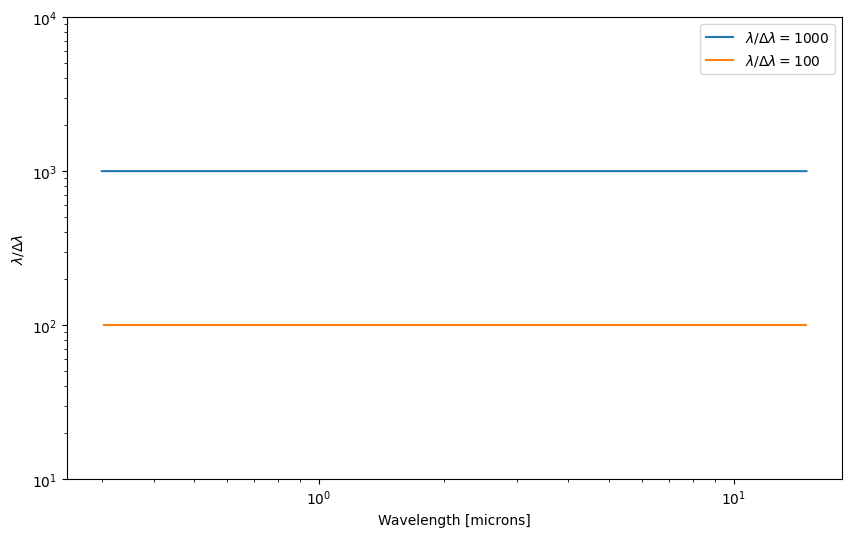

In [5]:
fig, ax = plt.subplots(figsize = (10,6))

mean_wavelength_standard = (wavelengths_standard_binning[1:] + wavelengths_standard_binning[:-1]) * 0.5
ax.plot(
    mean_wavelength_standard * 1e4, 
    mean_wavelength_standard / np.diff(wavelengths_standard_binning),
    label=r'$\lambda / \Delta \lambda=1000$'
)

mean_wavelength = (wavelengths[1:] + wavelengths[:-1]) * 0.5
ax.plot(
    mean_wavelength*1e4,
    mean_wavelength/np.diff(wavelengths),
    label=r'$\lambda / \Delta \lambda=100$'
)
ax.set_xscale('log')
ax.set_yscale('log')
plt.ylim([1e1,1e4])
plt.legend()
ax.set_xlabel('Wavelength [microns]')
ax.set_ylabel(r'$\lambda/\Delta\lambda$')

<div class="alert alert-warning">

Please note: **NEVER** mix line opacities of different resolutions in a single pRT object!

</div>

## Downsampling `lbl` opacities

In the line-by-line mode it is enough to just specify the desired downsampling factor. As pRT intrinsically has a spacing of $\lambda / \Delta \lambda = 10^6$, a spacing of $\lambda / \Delta \lambda = 250,000$ can be achieved when requesting a downsampling factor of $10^6/250,000 = 4$. This is then done by setting `line_by_line_opacity_sampling = 4` when creating the pRT object. We compare a nominal and downsampled case below, again by copying the [tutorial](./high_resolution_spectra.ipynb):

In [6]:
atmosphere_high_res = Radtrans(pressures = np.logspace(-10,2,130),
                               line_species = ['1H2-16O',
                                               '12C-16O'],
                               rayleigh_species = ['H2', 'He'],
                               gas_continuum_contributors = ['H2-H2', 'H2-He'],
                               wavelength_boundaries = [2.292, 2.294],
                               line_opacity_mode = 'lbl')

atmosphere_lower_res = Radtrans(pressures = np.logspace(-10,2,130),
                               line_species = ['1H2-16O',
                                               '12C-16O'],
                               rayleigh_species = ['H2', 'He'],
                               gas_continuum_contributors = ['H2-H2', 'H2-He'],
                               wavelength_boundaries = [2.292, 2.294],
                               line_opacity_mode = 'lbl',
                               line_by_line_opacity_sampling=4)

Loading Radtrans opacities...
 Loading line opacities of species '1H2-16O' from file '/home/dblain/petitRADTRANS/input_data/opacities/lines/line_by_line/H2O/1H2-16O/1H2-16O__HITRAN.R1e6_0.3-28mu.xsec.petitRADTRANS.h5'... Done.
 Loading line opacities of species '12C-16O' from file '/home/dblain/petitRADTRANS/input_data/opacities/lines/line_by_line/CO/12C-16O/12C-16O__HITEMP.R1e6_0.3-28mu.xsec.petitRADTRANS.h5'... Done.
 Successfully loaded all line opacities
 Loading CIA opacities for H2-H2 from file '/home/dblain/petitRADTRANS/input_data/opacities/continuum/collision_induced_absorptions/H2--H2/H2--H2-NatAbund/H2--H2-NatAbund__BoRi.R831_0.6-250mu.ciatable.petitRADTRANS.h5'... Done.
 Loading CIA opacities for H2-He from file '/home/dblain/petitRADTRANS/input_data/opacities/continuum/collision_induced_absorptions/H2--He/H2--He-NatAbund/H2--He-NatAbund__BoRi.DeltaWavenumber2_0.5-500mu.ciatable.petitRADTRANS.h5'... Done.
 Successfully loaded all CIA opacities
Successfully loaded all opacit

Please note that pRT will not save a resampled opacity file to your `input_data` folder. It just slices the opacity array, essentially doing this operation `[::line_by_line_opacity_sampling]`, which is very efficient.

Now let's calculate the emission spectrum from the [High Resolution Spectra](./high_resolution_spectra.ipynb) example:

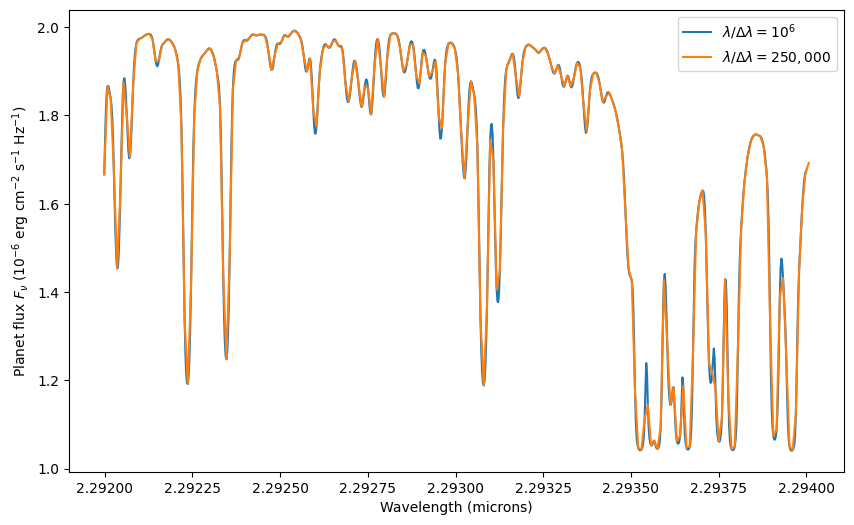

In [7]:
from petitRADTRANS.physics import temperature_profile_function_guillot_global

planet_radius = 1.0*cst.r_jup_mean
reference_gravity = 10**3.5
reference_pressure = 0.01

pressures_bar = atmosphere_high_res.pressures*1e-6 # cgs to bar
kappa_IR = 0.01
gamma = 0.4
T_int = 200.
T_equ = 1500.

temperatures = temperature_profile_function_guillot_global(pressures_bar, kappa_IR, gamma, reference_gravity, T_int, T_equ)


mass_fractions = {}
mass_fractions['H2'] = 0.74 * np.ones_like(temperatures)
mass_fractions['He'] = 0.24 * np.ones_like(temperatures)
mass_fractions['1H2-16O'] = 1e-3 * np.ones_like(temperatures)
mass_fractions['12C-16O'] = 1e-2 * np.ones_like(temperatures)

            #  2.33 is a typical value for H2-He dominated atmospheres
mean_molar_masses = 2.33 * np.ones_like(temperatures)

frequencies_nominal, flux_nominal, _ = atmosphere_high_res.calculate_flux(temperatures=temperatures, 
                                                 mass_fractions=mass_fractions, 
                                                 mean_molar_masses = mean_molar_masses,
                                                 reference_gravity = reference_gravity,
                                                 frequencies_to_wavelengths=False)

frequencies_lower_res, flux_lower_res, _ = atmosphere_lower_res.calculate_flux(temperatures=temperatures, 
                                                 mass_fractions=mass_fractions, 
                                                 mean_molar_masses = mean_molar_masses,
                                                 reference_gravity = reference_gravity,
                                                 frequencies_to_wavelengths=False)

fig, ax = plt.subplots(figsize = (10,6))
ax.plot(cst.c/frequencies_nominal/1e-4, flux_nominal/1e-6,label=r'$\lambda / \Delta \lambda = 10^6$')
ax.plot(cst.c/frequencies_lower_res/1e-4, flux_lower_res/1e-6,label=r'$\lambda / \Delta \lambda = 250,000$')

ax.set_xlabel('Wavelength (microns)')
ax.set_ylabel(r'Planet flux $F_\nu$ (10$^{-6}$ erg cm$^{-2}$ s$^{-1}$ Hz$^{-1}$)')
plt.legend()
plt.show()

Again, the numerically calculated resolution is consistent with what we requested:

Text(0, 0.5, '$\\lambda/\\Delta\\lambda$ ($10^6$)')

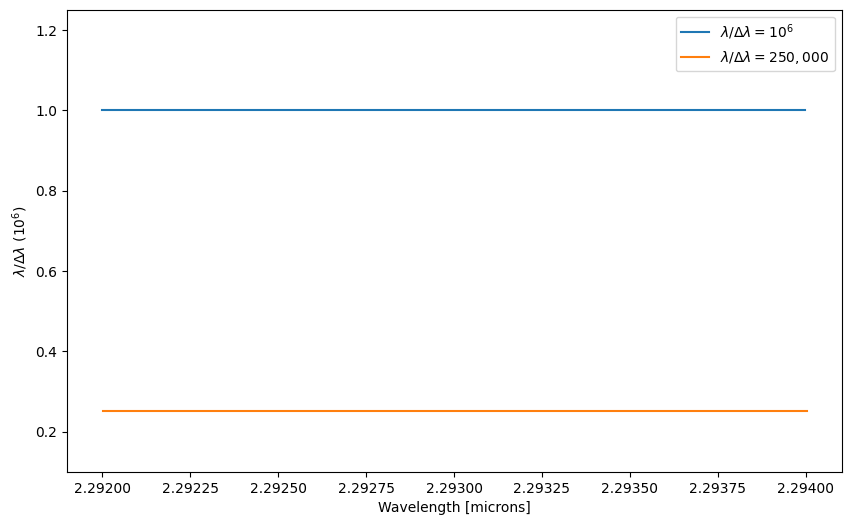

In [8]:
fig, ax = plt.subplots(figsize = (10,6))

frequencies_nominal_mean = (frequencies_nominal[1:] + frequencies_nominal[:-1])/2.
ax.plot(cst.c/frequencies_nominal_mean*1e4,
        -frequencies_nominal_mean/np.diff(frequencies_nominal)/1e6,
        label=r'$\lambda / \Delta \lambda=10^6$')

frequencies_lower_res_mean = (frequencies_lower_res[1:] + frequencies_lower_res[:-1])/2.
ax.plot(cst.c/frequencies_lower_res_mean*1e4,
        -frequencies_lower_res_mean/np.diff(frequencies_lower_res)/1e6,
        label=r'$\lambda / \Delta \lambda=250,000$')

plt.ylim([0.1,1.25])
plt.legend()
ax.set_xlabel('Wavelength [microns]')
ax.set_ylabel(r'$\lambda/\Delta\lambda$ ($10^6$)')

<div class="alert alert-warning">

Please always check that the difference between the downsampled spectrum and the spectrum at nominal resolution is negligible when both are binned down to the actual resolution of the data that you want to compare to.

</div>

## Wavelength binning vs. spectral resolution

Above we used "wavelength binning" and "resolution" interchangeably. In all cases we mean $\lambda/\Delta \lambda$, where $\lambda$ is the wavelength at which the opacities in pRT are defined, and $\Delta \lambda$ is the wavelength difference between two neighboring wavelength points. Please note that for the "spectral resolution" of exoplanet data something different is meant. In this case $R = \lambda/\Delta\lambda_{\rm LSF}$, where $\lambda$ is the wavelengths at which the data has been recorded, and $\Delta \lambda_{\rm LSF}$ is the [FWHM](https://en.wikipedia.org/wiki/Full_width_at_half_maximum) of the spectrograph's line spread function (LSF). The LSF describes how finely light of a given frequency is resolved at the detector location. For perfectly mono-chromatic light (i.e., the spectrum is a $\delta$-function) the spectrograph would record a spectrum that is equal to the LSF. If your data has sufficiently small wavelength binning to resolve the LSF (usually defined by the pixel scale of the detector for unbinned data), pRT's wavelength binning should at least be high enough to ensure that $\lambda/\Delta \lambda > 2\lambda/\Delta \lambda_{\rm LSF}$, in order to stay [Nyquist-sampled](https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem).